# D팀
## 김지민, 유민균, 김종한, 조수환, 고예은

In [22]:
import sys
import numpy as np
import pandas as pd

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

bus_station = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")

In [24]:
# 데이터 프레임의 Shape을 확인합니다.

bus_station.shape

(1169878, 8)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [25]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [26]:
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503


In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 하고 싶습니다.

* 'bus_station' 데이터의 정보를 확인해보세요.

* 어떻게 해야 할까요?? (tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.)

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [29]:
bus_station["버스정류장ARS번호"]

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [30]:
# 버스정류장 ARS 번호의 앞자리 2개로 새로 컬럼 생성합니다

bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0, stop=2)
bus_station['자치구']

0          06
1          06
2          06
3          06
4          11
           ..
1169873    12
1169874    06
1169875    16
1169876    25
1169877    06
Name: 자치구, Length: 1169878, dtype: object

* 버스정류장 ARS 번호 - 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [31]:
# 구 코드를 구 이름으로 변환합니다

bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### [실습문제4] 결측치를 처리 합시다 



In [33]:
# (가상기점),(가상종점)때문에 ARS번호가 '~'로 나오는 곳이 있습니다 확인해볼까요?

bus_station.loc[bus_station['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
747,20220401,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상),0,100,20220404,NaN
852,20220401,602,602번(양천공용차고지~시청앞),~,양천공영차고지(기점가상),10,0,20220404,NaN
1048,20220401,2227,2227번(중랑공영차고지~중곡역),~,중랑공영차고지(기점가상),1,0,20220404,NaN
1252,20220401,2311,2311번(중랑차고지~문정동),~,중랑공영차고지(기점가상),7,0,20220404,NaN
1479,20220401,2312,2312번(중랑공영차고지~강동공영차고지),~,중랑공영차고지(기점가상),4,0,20220404,NaN
...,...,...,...,...,...,...,...,...,...
1168831,20220430,1119,1119번(강북청소년수련관난나~녹천역),~,선일교통종점(가상),0,1,20220503,NaN
1169138,20220430,5523,5523번(보성운수기종점~서울대입구역),~,보성운수기종점(가상),2,129,20220503,NaN
1169509,20220430,153,153번(우이동~당곡사거리),~,우이동도선사입구(기점가상),10,2,20220503,NaN
1169612,20220430,2015,2015번(신내공영차고지~동대문운동장),~,중랑공영차고지(기점가상),16,0,20220503,NaN


In [34]:
# NaN 값을 제거 하겠습니다

bus_station = bus_station.dropna()

In [35]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  object
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 81.2+ MB


In [36]:
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})

#### [실습문제5] 구별로 버스정류장이 몇 개 있는지 궁금합니다

* 구별로 버스 정류장의 개수를 확인해 주세요


In [37]:
# nunique로 고유값의 갯수만 확인해볼게요

bus_station_count = bus_station.groupby("자치구")["버스정류장ARS번호"].nunique()
bus_station_count

자치구
강남구     506
강동구     373
강북구     413
강서구     566
관악구     468
광진구     272
구로구     486
금천구     345
노원구     515
도봉구     361
동대문구    306
동작구     442
마포구     568
서대문구    460
서초구     600
성동구     436
성북구     606
송파구     416
양천구     323
영등포구    467
용산구     323
은평구     501
종로구     350
중구      178
중랑구     423
Name: 버스정류장ARS번호, dtype: int64

In [38]:
# 강남구와 서초구에 500 개가 넘는 버스정류장이 있다는데, 확인해봅시다.
bus_station_unique = bus_station.groupby("자치구")["버스정류장ARS번호"].unique()
np.set_printoptions(threshold=sys.maxsize)
print(bus_station_unique['강남구'])

[23783 23081 23074 23062 23045 23061 23771 23419 23420 23421 23405 23423
 23424 23425 23150 23404 23406 23465 23380 23381 23382 23362 23395 23240
 23511 23509 23242 23197 23192 23172 23173 23174 23175 23180 23161 23155
 23151 23430 23429 23149 23157 23159 23182 23183 23184 23186 23187 23189
 23199 23244 23245 23236 23360 23361 23449 23383 23384 23450 23385 23407
 23408 23320 23426 23427 23428 23411 23416 23417 23418 23287 23288 23305
 23306 23259 23260 23201 23217 23218 23277 23280 23283 23284 23196 23188
 23171 23166 23165 23158 23156 23148 23104 23102 23101 23103 23167 23169
 23170 23198 23473 23438 23249 23262 23224 23225 23226 23227 23456 23334
 23335 23336 23457 23338 23459 23339 23340 23326 23327 23228 23229 23233
 23234 23247 23248 23168 23531 23190 23210 23212 23216 23290 23178 23432
 23162 23163 23160 23507 23127 23200 23136 23213 23211 23191 23243 23202
 23203 23393 23442 23527 23530 23463 23471 23447 23480 23437 23110 23111
 23112 23124 23125 23181 23137 23482 23448 23138 23

In [39]:
# 서울의 버스 정류장 데이터만 포함하고 있는 csv 파일 입니다 (서울 공공데이터 포탈)
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do
only_seoul = pd.read_csv('1.1 bus_station.csv', sep=",", encoding = "UTF-8")

In [40]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [41]:
only_seoul

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


In [42]:
only_seoul.loc[only_seoul['ARS-ID'] == 23784]

,ARS-ID,정류소명


In [43]:
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)


In [44]:
df = pd.merge(only_seoul,bus_station,how='inner', on='버스정류장ARS번호')

In [45]:
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20220401,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리,4,9,20220404,종로구
1,1001,종로2가사거리,20220401,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리,5,6,20220404,종로구
2,1001,종로2가사거리,20220401,741,741번(진관차고지~헌인릉입구),종로2가사거리,206,203,20220404,종로구
3,1001,종로2가사거리,20220401,470,470번(상암차고지~안골마을),종로2가사거리,303,239,20220404,종로구
4,1001,종로2가사거리,20220402,741,741번(진관차고지~헌인릉입구),종로2가사거리,132,159,20220405,종로구
...,...,...,...,...,...,...,...,...,...,...
1060881,25990,암사삼성.현대아파트,20220426,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,89,30,20220429,강동구
1060882,25990,암사삼성.현대아파트,20220427,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,88,40,20220430,강동구
1060883,25990,암사삼성.현대아파트,20220428,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,82,33,20220501,강동구
1060884,25990,암사삼성.현대아파트,20220429,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,96,37,20220502,강동구


In [46]:
# 구 별로 버스 정류장의 개수를 확인해 주세요

seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()
seoul_bus_station_ARS.sort_values('버스정류장ARS번호',ascending=False)

,자치구,버스정류장ARS번호
16,성북구,602
14,서초구,600
3,강서구,566
12,마포구,562
8,노원구,514
21,은평구,501
0,강남구,499
6,구로구,486
4,관악구,466
19,영등포구,465


In [47]:
df['버스정류장ARS번호'].nunique()

10615

#### [실습문제6] 구 별로 버스 노선이 몇 개나 지나가는지 궁금합니다.

* 구별로 버스 노선의 개수를 확인해 주세요

In [48]:
seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()
seoul_bus_station_line.sort_values('노선번호',ascending=False)

,자치구,노선번호
13,서대문구,107
22,종로구,106
23,중구,103
19,영등포구,101
16,성북구,99
12,마포구,97
11,동작구,94
14,서초구,93
0,강남구,91
4,관악구,86


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수를 알아봅시다

* groupby 를 활용해 봅시다.

In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].sum()
seoul_bus_station_sum


C:\Users\PC\AppData\Local\Temp\ipykernel_6680\3130414315.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].sum()


,자치구,승차총승객수,하차총승객수
0,강남구,8030483,7569213
1,강동구,2890053,2830506
2,강북구,4825181,4671783
3,강서구,4681083,4652828
4,관악구,7655819,7792476
5,광진구,2749448,2753411
6,구로구,4942197,4730992
7,금천구,3776658,3581930
8,노원구,4353295,4292724
9,도봉구,3304305,3211421


#### [실습문제8] 각 구별로 승차 평균 승객수, 하차 평균 승객수를 알아봅시다

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)
seoul_bus_station_mean

C:\Users\PC\AppData\Local\Temp\ipykernel_6680\564739230.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)["승차총승객수","하차총승객수"].mean()


,자치구,승차평균승객수,하차평균승객수
0,강남구,128.767927,121.371512
1,강동구,99.161194,97.118065
2,강북구,133.020373,128.791504
3,강서구,88.119480,87.587591
4,관악구,154.753674,157.516040
5,광진구,118.352546,118.523137
6,구로구,119.235615,114.140076
7,금천구,123.098370,116.751304
8,노원구,88.476211,87.245168
9,도봉구,106.859356,103.855540


#### [실습문제9] 데이터 프레임을 합쳐보겠습니다. 

In [51]:
# 네 개 파일을 합쳐볼까요

# seoul_bus_station_ARS - 정류장 수
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')

In [52]:
# column 이름을 바꿔주겠습니다.
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


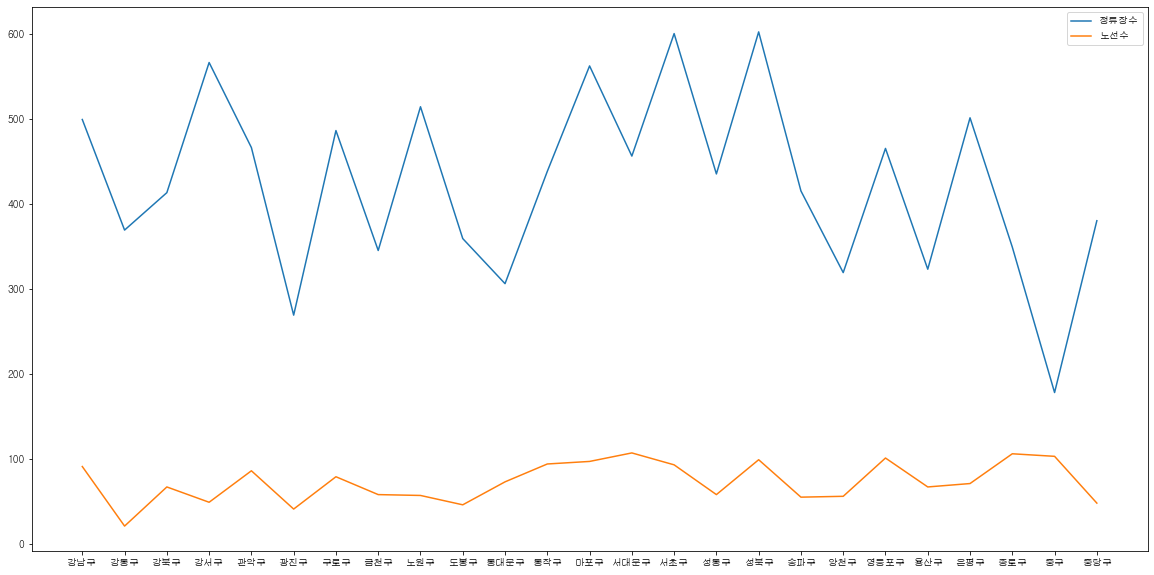

In [54]:
# 구별 정류장, 노선 수
plt.figure(figsize=(20,10))
plt.plot('자치구','정류장수',data=seoul_bus_station)
plt.plot('자치구','노선수',data=seoul_bus_station)
plt.legend()

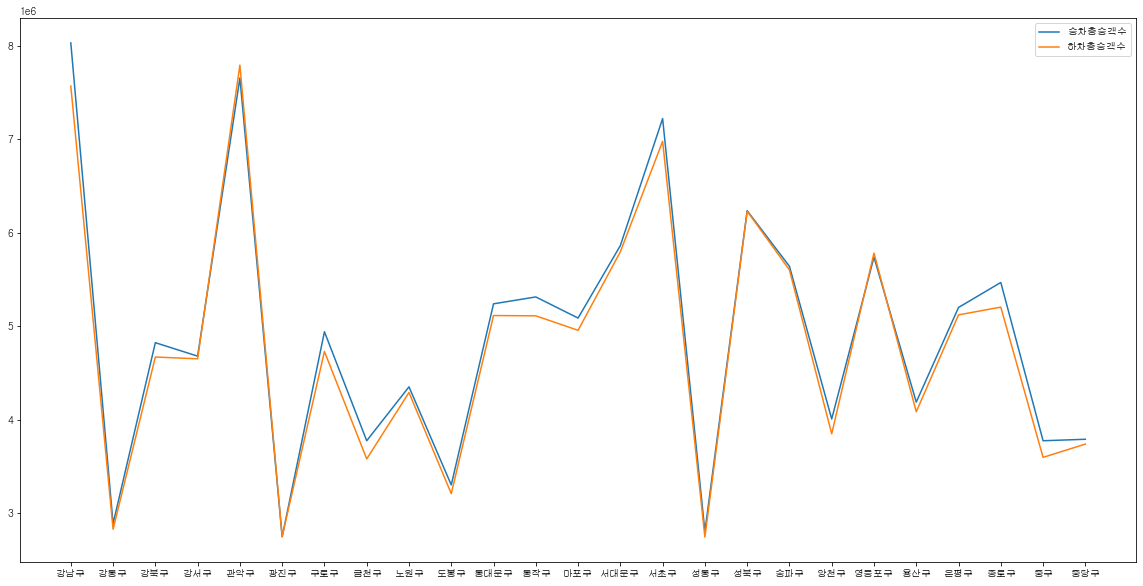

In [55]:
# 구별 승하차총승객수
plt.figure(figsize=(20,10))
plt.plot('자치구','승차총승객수',data=seoul_bus_station)
plt.plot('자치구','하차총승객수',data=seoul_bus_station)
plt.legend()

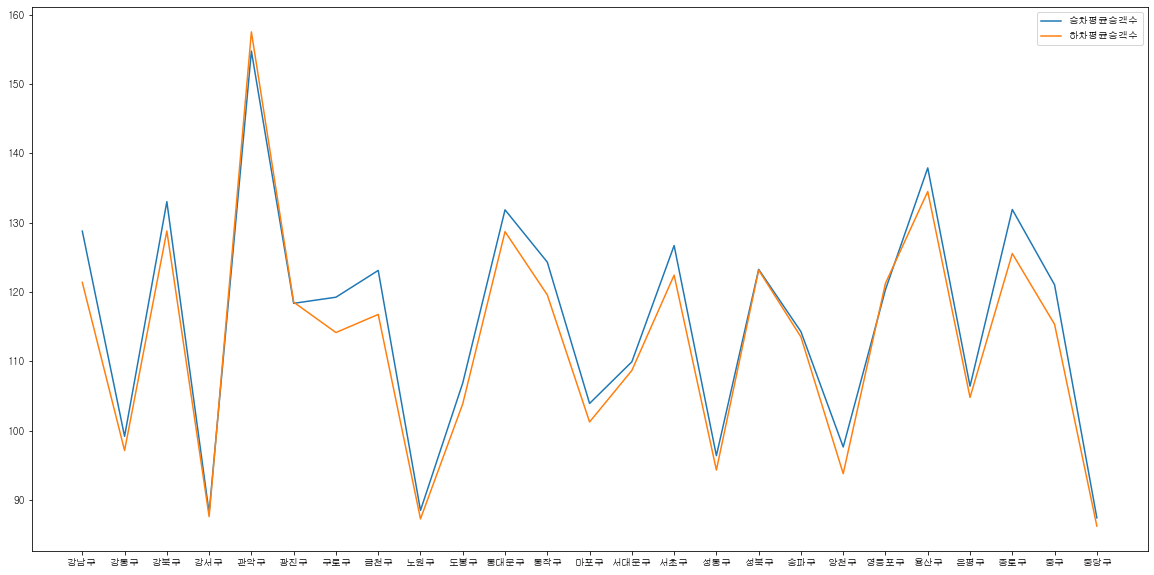

In [56]:
# 구별 승하차평균승객수
plt.figure(figsize=(20,10))
plt.plot('자치구','승차평균승객수',data=seoul_bus_station)
plt.plot('자치구','하차평균승객수',data=seoul_bus_station)
plt.legend()

In [57]:
seoul_bus_station.sort_values('승차총승객수',ascending=False)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
4,관악구,466,86,7655819,7792476,154.753674,157.516040
14,서초구,600,93,7221330,6977950,126.687777,122.418028
16,성북구,602,99,6236424,6231238,123.251922,123.149430
13,서대문구,456,107,5863499,5796960,109.914502,108.667192
19,영등포구,465,101,5739875,5783211,120.337855,121.246404
17,송파구,415,55,5641742,5603488,114.270072,113.495260
22,종로구,349,106,5468935,5205394,131.889620,125.534028
11,동작구,438,94,5314274,5112276,124.295965,119.571419
10,동대문구,306,73,5240565,5115379,131.841430,128.692017


In [58]:
seoul_bus_station.sort_values('승차평균승객수',ascending=False)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
4,관악구,466,86,7655819,7792476,154.753674,157.516040
20,용산구,323,67,4189977,4086474,137.891694,134.485421
2,강북구,413,67,4825181,4671783,133.020373,128.791504
22,종로구,349,106,5468935,5205394,131.889620,125.534028
10,동대문구,306,73,5240565,5115379,131.841430,128.692017
0,강남구,499,91,8030483,7569213,128.767927,121.371512
14,서초구,600,93,7221330,6977950,126.687777,122.418028
11,동작구,438,94,5314274,5112276,124.295965,119.571419
16,성북구,602,99,6236424,6231238,123.251922,123.149430
7,금천구,345,58,3776658,3581930,123.098370,116.751304


Text(0.5, 1.0, '상관관계')

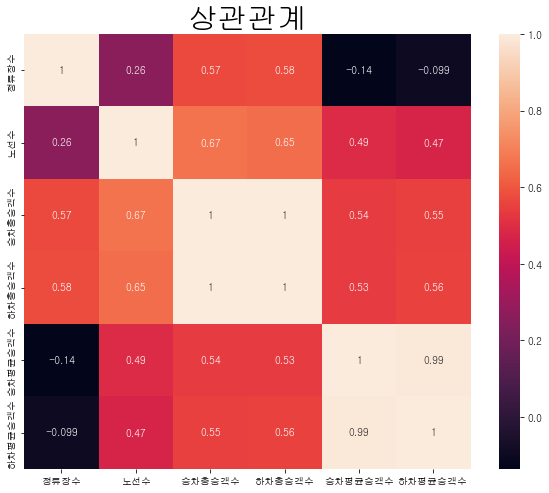

In [59]:
# 속성별 상관관계
cor=seoul_bus_station.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

## 위 차트를 통해 알게된 사실을 정리해봅시다.
### 1. 그래프와 상관관계를 보면 정류장 수와 노선 수의 상관관계는 작음. 즉, 정류장 수가 많다고 해서 노선 수도 많은 것은 아님.
### 2. 그래프와 상관관계를 보면 승하차 총 승객수와 평균 승객수의 상관관계는 크지 않음. 즉 승하차 승객수의 평균이 크다고 해서 총 합이 많은 것은 아님.
### 3. 그나마 노선수와 승하차 총 승객수와의 관계는 큰 것을 볼 수 있다.

In [60]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)

---

---

In [61]:
#산점도 찍기
from matplotlib import pyplot
import numpy 
import seaborn as sns; sns.set()
plt.rcParams['font.family'] = 'NanumGothic'

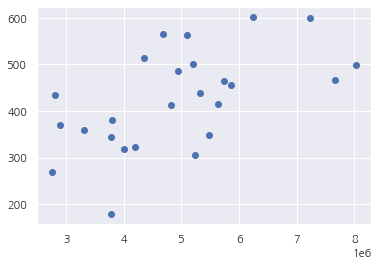

In [62]:
#pyplot 으로 상관관계를 그려봤습니다.
pyplot.scatter(seoul_bus_station['승차총승객수'], seoul_bus_station['정류장수'],)

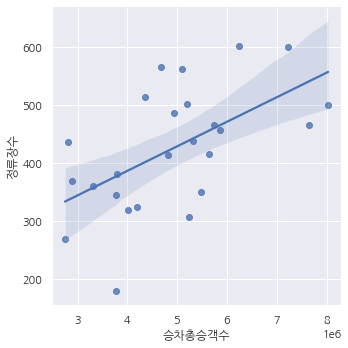

In [63]:
#seaborn 으로 회귀선을 그렸습니다.

ax = sns.lmplot(x='승차총승객수',y='정류장수', data=seoul_bus_station)

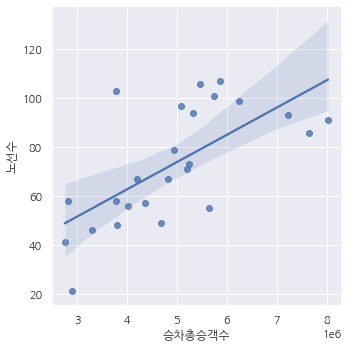

In [64]:
#seabron 으로 회귀선을 그렸습니다.
ax = sns.lmplot(x='승차총승객수',y='노선수', data=seoul_bus_station)

## 위 차트를 통해 알게된 사실을 정리해봅시다.
### 회귀선 아래쪽으로 그려져있는게 승객수에비해 노선수가 적은구입니다. 멀리떨어져있을수록 많이 노선수가 부족하다이고
### 가장 많이 떨어진 구를 확인해보니 정류장수가 부족한구 중구이고, 노선수가 부족한 구는 강동구이다.
### 1. 중구가 승차총승객수에 비해  정류장수가 너무적다 더욱더 정류장이 필요하다.
### 2. 강동구가 노선수가 승차총승객수이비해 너무적다 더욱더 노선이 필요하다